[[ 1.00194175 -0.03049421  0.15115429  0.22811143  0.02736602  0.13868473
   0.16902344]
 [-0.03049421  1.00194175  0.07505357 -0.10884402  0.82865356 -0.25662652
   0.06920886]
 [ 0.15115429  0.07505357  1.00194175  0.08170361  0.11374335  0.18095022
   0.01009957]
 [ 0.22811143 -0.10884402  0.08170361  1.00194175  0.06127009 -0.03217022
   0.09469703]
 [ 0.02736602  0.82865356  0.11374335  0.06127009  1.00194175 -0.20078069
   0.11512625]
 [ 0.13868473 -0.25662652  0.18095022 -0.03217022 -0.20078069  1.00194175
   0.        ]
 [ 0.16902344  0.06920886  0.01009957  0.09469703  0.11512625  0.
   1.00194175]]
Eigenvalues:
[1.9632472  0.15326685 1.45451717 0.67420804 0.74291868 1.09626774
 0.92916654]
Eigenvectors:
[[-0.01529531  0.00438522 -0.61021254  0.40535504 -0.6696721   0.11850718
   0.02387675]
 [ 0.66855861 -0.70680999  0.03846796 -0.09904464 -0.1391302  -0.14523539
   0.04133846]
 [ 0.07128445 -0.00523531 -0.43454151  0.3886713   0.51866918 -0.5838478
  -0.21237571]
 [-0.008544

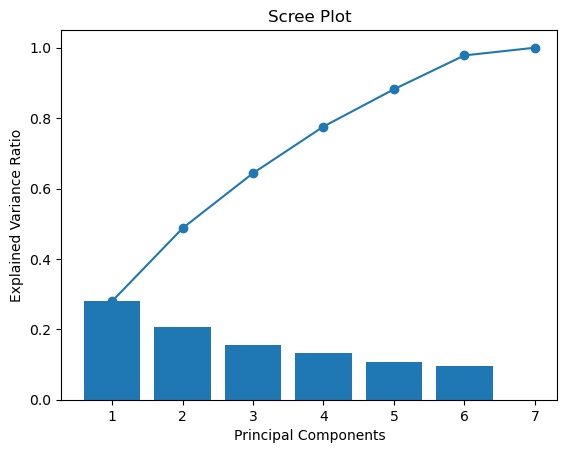

Reduced-dimensional Data:
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.246079 -0.453701 -0.132175  1.406282  1.027381  0.696511
1 -0.535873 -1.701779  0.508182  0.668608  0.601298  0.823060
2  0.221558 -0.563274 -0.157787  1.850489  0.274252 -0.282561
3  0.067476 -1.126258  0.246698  1.205389  0.538299  0.097519
4 -0.674204 -1.590134  0.613956  0.591601  0.694913  0.724606


Text(0, 0.5, 'Principal Component 2 (PC2)')

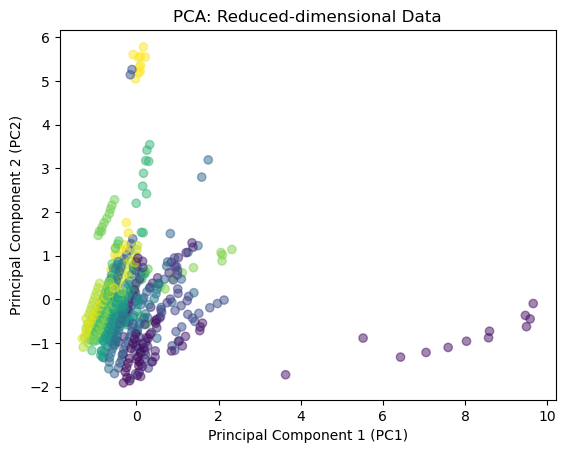

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
nb_record = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
nb_record['Country'] = label_encoder.fit_transform(nb_record['Country'])
nb_record['Year'] = label_encoder.fit_transform(nb_record['Year'])
X = nb_record.drop(columns=['Value'])
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
cov_matrix = np.cov(X_standardized, rowvar=False)
print(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Determine the number of components that capture a desired amount of variance
desired_variance = 0.96 
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to capture {desired_variance * 100}% variance: {num_components}")
# Apply PCA with the desired number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

# Display the explained variance ratio for each selected component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(explained_variance_ratio)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


# Reduce Data View
reduced_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print("Reduced-dimensional Data:")
print(reduced_df.head())
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=nb_record['Country'], cmap='viridis', alpha=0.5)
plt.title('PCA: Reduced-dimensional Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

Text(0, 0.5, 'Principal Component 6')

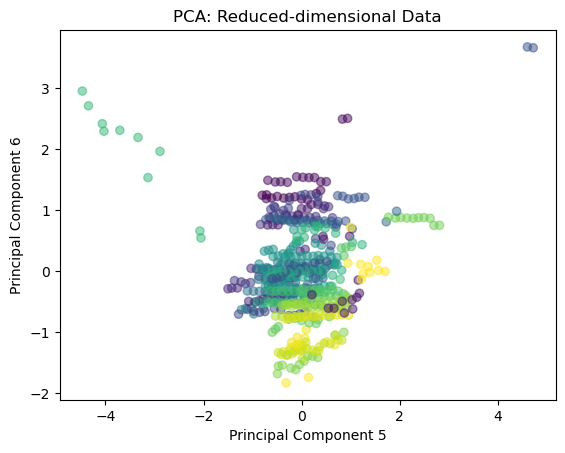

In [40]:
# Scatter Plot of Reduced-dimensional Data using the last two components
plt.scatter(reduced_df.iloc[:, -2], reduced_df.iloc[:, -1], c=nb_record['Country'], cmap='viridis', alpha=0.5)
plt.title('PCA: Reduced-dimensional Data')
plt.xlabel(f'Principal Component {num_components - 1}')
plt.ylabel(f'Principal Component {num_components}')
